In [5]:
import numpy as np
from pathlib import Path
import pandas as pd

In [10]:
missing_path= Path("/content/machine_temp_failure_original.csv")

In [11]:
df1= pd.read_csv(missing_path)

In [12]:
df1[df1.isnull().any(axis=1)]

,timestamp,value


In [13]:
df1.describe()

,value
count,22695.000000
mean,85.926498
std,13.746912
min,2.084721
25%,83.080078
50%,89.408246
75%,94.016252
max,108.510543


In [14]:
df1.rename(columns={"value": "temperature"}, inplace=True)

In [15]:
delta_temperature= []

In [16]:
df1['delta_temperature'] = df1['temperature'].shift(-1) - df1['temperature']
df1.loc[len(df1) - 1, 'delta_temperature'] = pd.NA
print(df1)

                 timestamp  temperature  delta_temperature
0      2013-12-02 21:15:00    73.967322           0.968560
1      2013-12-02 21:20:00    74.935882           1.188280
2      2013-12-02 21:25:00    76.124162           2.016546
3      2013-12-02 21:30:00    78.140707           1.189128
4      2013-12-02 21:35:00    79.329836          -0.619417
...                    ...          ...                ...
22690  2014-02-19 15:05:00    98.185415          -0.381246
22691  2014-02-19 15:10:00    97.804168          -0.668700
22692  2014-02-19 15:15:00    97.135468           0.921384
22693  2014-02-19 15:20:00    98.056852          -1.152991
22694  2014-02-19 15:25:00    96.903861                NaN

[22695 rows x 3 columns]


In [17]:
import matplotlib.pyplot as plt

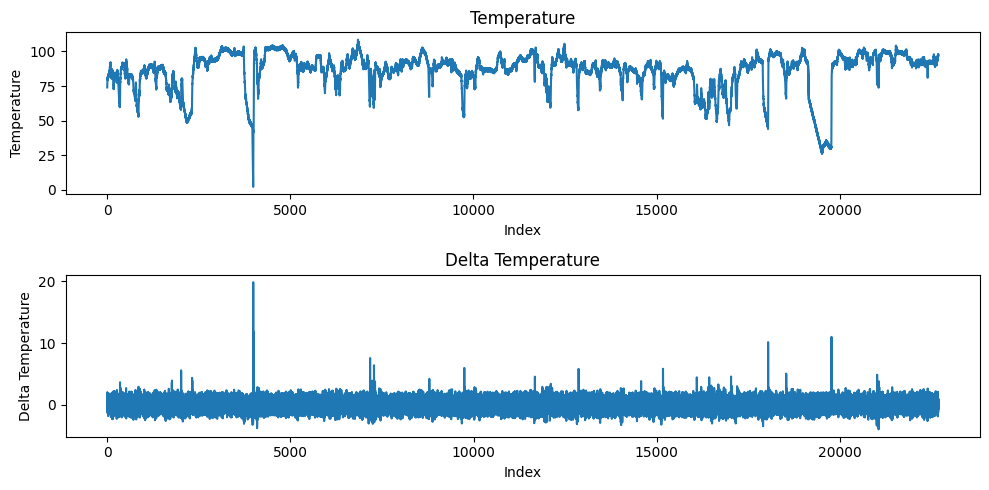

In [18]:
fig, (axis1, axis2) = plt.subplots(2, 1, figsize=(10, 5))

# Plot for temperature
axis1.plot(df1.index, df1['temperature'])
axis1.set_xlabel('Index')
axis1.set_ylabel('Temperature')
axis1.set_title('Temperature')

# Plot for delta_temperature
axis2.plot(df1.index, df1['delta_temperature'])
axis2.set_xlabel('Index')
axis2.set_ylabel('Delta Temperature')
axis2.set_title('Delta Temperature')

plt.tight_layout()

plt.show()



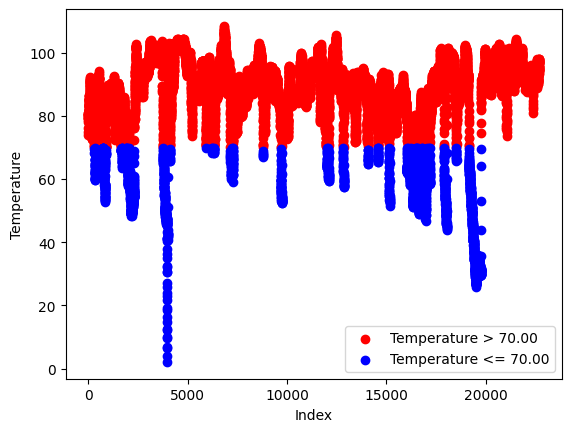

In [19]:
above = df1[df1['temperature'] > 70.00]
below = df1[df1['temperature'] <= 70.00]

plt.scatter(above.index, above['temperature'], c='red', label='Temperature > 70.00')
plt.scatter(below.index, below['temperature'], c='blue', label='Temperature <= 70.00')

plt.xlabel('Index')
plt.ylabel('Temperature')

plt.legend()
plt.show()





In [20]:
def read_dataset(folder, file, date_col=None):
    df = pd.read_csv(folder / file, 
                     index_col=date_col,parse_dates=[date_col])
    return df


In [21]:
def plot_dfs(df1, df2, col, title=None, xlabel=None, ylabel=None): 
    df_missing = df2.rename(columns={col: 'missing'})
    
    columns = df_missing.loc[:, 'missing':].columns.tolist()
    subplots_size = len(columns)
    
    # subplots_size = df2.shape[1]
    fig, ax = plt.subplots(subplots_size+1, 1, sharex=True)
    plt.subplots_adjust(hspace=0.25)
    fig.suptitle(title)
    
    df1[col].plot(ax=ax[0], figsize=(10, 16))
    ax[0].set_title('Original Dataset')
    ax[0].set_xlabel(xlabel)
    ax[0].set_ylabel(ylabel)    
    
    for i, colname in enumerate(columns):
        df_missing[colname].plot(ax=ax[i+1])
        ax[i+1].set_title(colname)

    plt.show()


In [22]:
def rmse_score(df1, df2, col=None):
    '''
    df1: original dataframe without missing data
    df2: dataframe with missing data
    col: column name that contains missing data

    returns: a list of scores
    '''
    df_missing = df2.rename(columns={col: 'missing'})
    columns = df_missing.loc[:, 'missing':].columns.tolist()
    scores = []
    for comp_col in columns[1:]:
        rmse = np.sqrt(np.mean((df1[col] - df_missing[comp_col])**2))
        scores.append(rmse)
        print(f'RMSE for {comp_col}: {rmse}')
    return scores


In [24]:
folder = Path("/content/sample_data")
file3 = "machine_temp_failure_original.csv"
col = "timestamp"

df3 = read_dataset(folder,file3,col)
df3.head()


,value
timestamp,
2013-12-02 21:15:00,73.967322
2013-12-02 21:20:00,74.935882
2013-12-02 21:25:00,76.124162
2013-12-02 21:30:00,78.140707
2013-12-02 21:35:00,79.329836


In [25]:
folder = Path("/content/sample_data")
file4 = "machine_temp_failure_missing.csv"
value_col = "timestamp"

df4 = read_dataset(folder,file4,value_col)
df4.head()

,value
timestamp,
2013-02-12 21:15:00,73.967322
2013-02-12 21:20:00,74.935882
2013-02-12 21:25:00,76.124162
2013-02-12 21:30:00,78.140707
2013-02-12 21:35:00,79.329836


In [26]:
df4.isnull().sum()

value    1285
dtype: int64

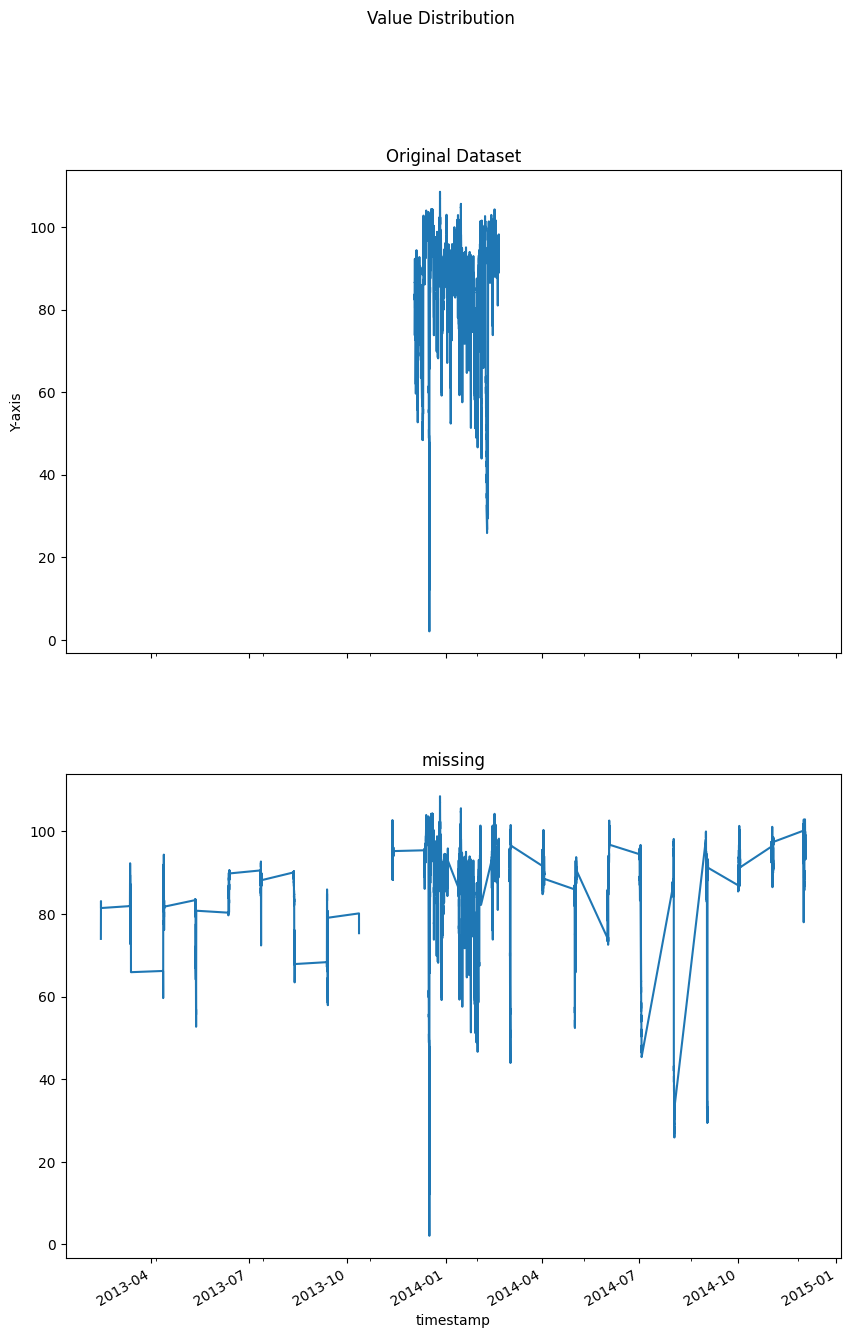

In [27]:
plot_dfs(df3, df4, 'value',title="Value Distribution",xlabel="X-axis", ylabel="Y-axis")

In [28]:
df4['ffill'] = df4['value'].fillna(method='ffill')
df4['bfill'] = df4['value'].fillna(method='bfill')
df4['mean'] = df4['value'].fillna(df4['value'].mean())

In [29]:
methods = ['mean', 'ffill', 'bfill']
rmse_scores =rmse_score(df3,df4,'value')
min_rmse = min(rmse_scores)
best_method = methods[rmse_scores.index(min_rmse)]

print("Method with the least RMSE score:", best_method)

RMSE for ffill: 1.4666115658526897
RMSE for bfill: 5.538329974927272
RMSE for mean: 2.6118121108260417
Method with the least RMSE score: mean


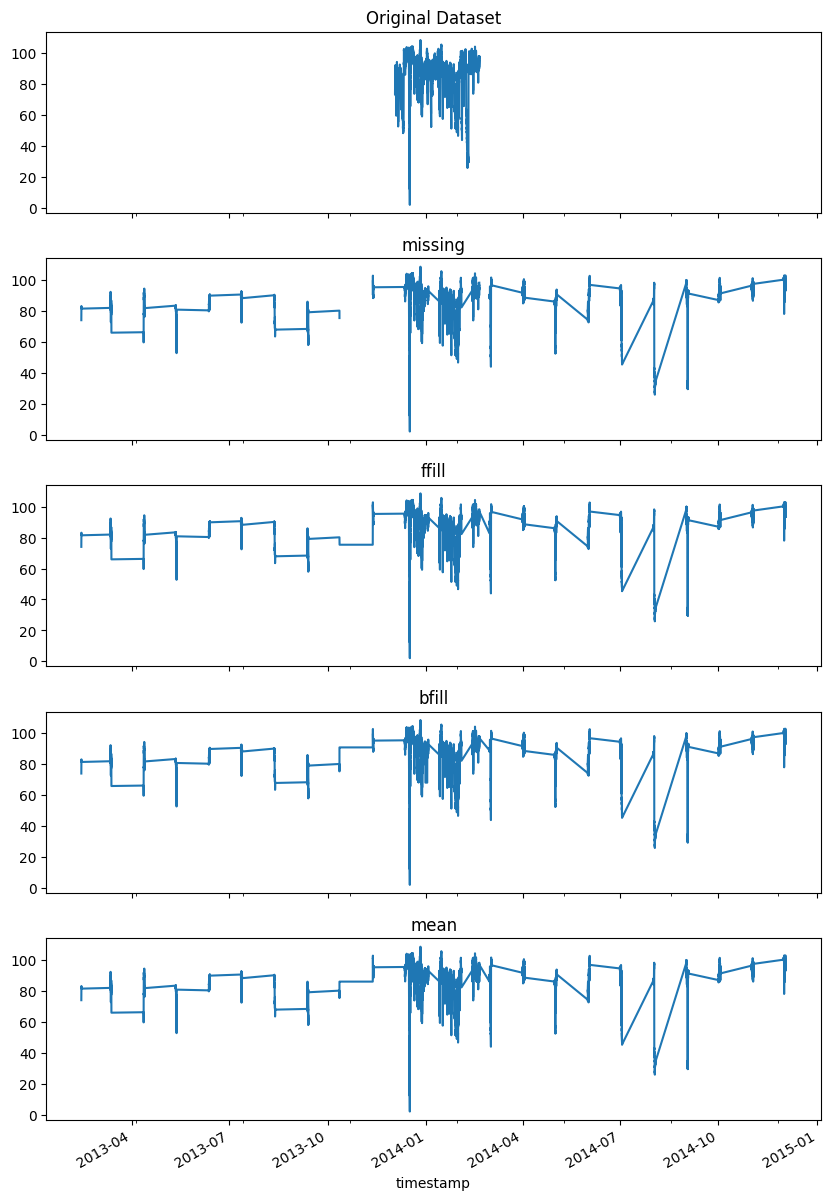

In [31]:
plot_dfs(df3, df4, 'value')